# Most of code comes from the SRK works in the following kaggle thread
[https://www.kaggle.com/sudalairajkumar/the-nature-conservancy-fisheries-monitoring/simple-exploration-notebook-nda-compliant](https://www.kaggle.com/sudalairajkumar/the-nature-conservancy-fisheries-monitoring/simple-exploration-notebook-nda-compliant)

# Data Exploration

In [3]:
import numpy as np
import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output

## distribution of fish species : imbalanced

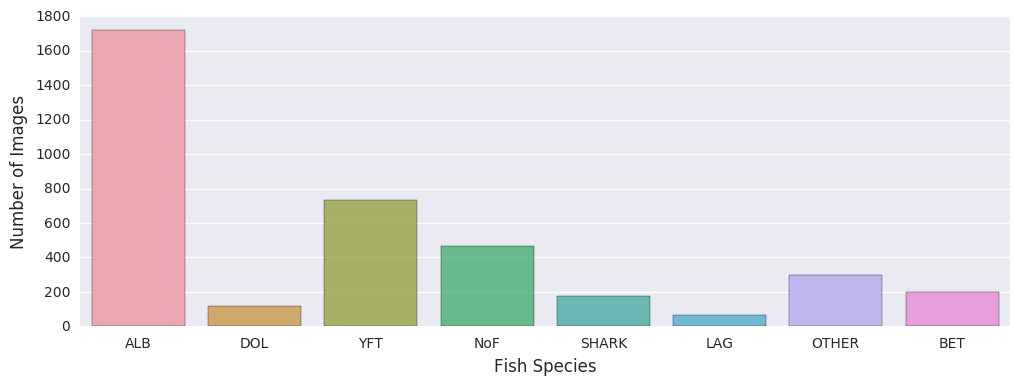

In [13]:
sub_folders = check_output(["ls", "./train/"]).decode("utf8").strip().split('\n')
count_dict = {}
for sub_folder in sub_folders:
    num_of_files=len(check_output(["ls","./train/"+sub_folder]).decode("utf-8").strip().split('\n'))
    count_dict[sub_folder] = num_of_files
plt.figure(figsize=(12,4))
sns.barplot(list(count_dict.keys()), list(count_dict.values()), alpha=0.8)
plt.xlabel("Fish Species", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.show()

# distribution of training image size 

processing sub folder : ALB, containing 1719 files
processing sub folder : BET, containing 200 files
processing sub folder : DOL, containing 117 files
processing sub folder : LAG, containing 67 files
processing sub folder : NoF, containing 465 files
processing sub folder : OTHER, containing 299 files
processing sub folder : SHARK, containing 176 files
processing sub folder : YFT, containing 734 files


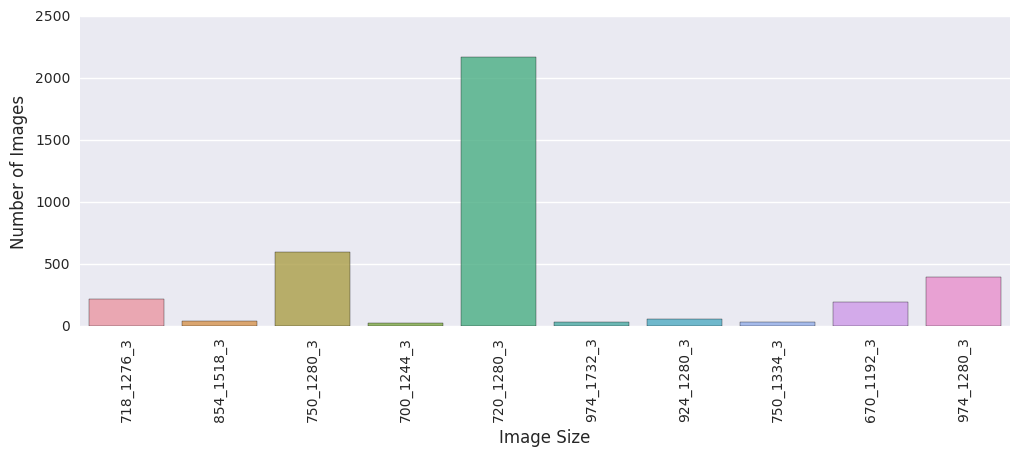

In [22]:
count_file_sizes = {}
for sub_folder in sub_folders:
    file_names = check_output(["ls","./train/"+sub_folder]).decode("utf-8").strip().split('\n')
    print("processing sub folder : {}, containing {} files".format(sub_folder,len(file_names)))
    for file_name in file_names:
        file_path = "./train/" + sub_folder + "/" + file_name
        img = imread(file_path)
        size_str = "_".join(map(str,list(img.shape))) 
        count_file_sizes[size_str] = count_file_sizes.get(size_str,0) + 1
plt.figure(figsize=(12,4))
sns.barplot(list(count_file_sizes.keys()), list(count_file_sizes.values()), alpha=0.8)
plt.xlabel("Image Size", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation='vertical')
plt.show()        